In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('exp7_data.csv')

X = df.iloc[:, :-2].values
Y = df.iloc[:, -2:].values

# Manually split the data into training and test sets
np.random.seed(2)
r = np.random.permutation(len(X))
X_train, X_test = X[r[128:]], X[r[:128]]
Y_train, Y_test = Y[r[128:]], Y[r[:128]]



In [13]:
# Initialize linear regression models
linear_model = LinearRegression()
lasso_model = Lasso(alpha=0.1)  
ridge_model = Ridge(alpha=0.1)  

linear_model.fit(X_train, Y_train)
lasso_model.fit(X_train, Y_train)
ridge_model.fit(X_train, Y_train)

linear_pred = linear_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)
ridge_pred = ridge_model.predict(X_test)

linear_mse = mean_squared_error(Y_test, linear_pred)
lasso_mse = mean_squared_error(Y_test, lasso_pred)
ridge_mse = mean_squared_error(Y_test, ridge_pred)
error = np.linalg.norm(Y_test - linear_pred) / np.linalg.norm(Y_test)

linear_mae = mean_absolute_error(Y_test, linear_pred)
lasso_mae = mean_absolute_error(Y_test, lasso_pred)
ridge_mae = mean_absolute_error(Y_test, ridge_pred)
error2 = np.linalg.norm(Y_test - lasso_pred) / np.linalg.norm(Y_test)

linear_r2 = r2_score(Y_test, linear_pred)
lasso_r2 = r2_score(Y_test, lasso_pred)
ridge_r2 = r2_score(Y_test, ridge_pred)
error3 = np.linalg.norm(Y_test - ridge_pred) / np.linalg.norm(Y_test)

# Print results
print("Linear Regression:")
print("MSE:", linear_mse)
print("MAE:", linear_mae)
print("R2 Score:", linear_r2)
print("Overall prediction error:", error)

print()

print("Lasso Regression:")
print("MSE:", lasso_mse)
print("MAE:", lasso_mae)
print("R2 Score:", lasso_r2)
print("Overall prediction error:", error2)

print()

print("Ridge Regression:")
print("MSE:", ridge_mse)
print("MAE:", ridge_mae)
print("R2 Score:", ridge_r2)
print("Overall prediction error:", error3)


Linear Regression:
MSE: 11.54362930324854
MAE: 2.4603360342707727
R2 Score: 0.8699288286376311
Overall prediction error: 0.13021187164767753

Lasso Regression:
MSE: 12.234345830500732
MAE: 2.5700519409561116
R2 Score: 0.8621860313909353
Overall prediction error: 0.13405091161929883

Ridge Regression:
MSE: 11.597135734897833
MAE: 2.4820980593135524
R2 Score: 0.8692973577054459
Overall prediction error: 0.13051329841802017


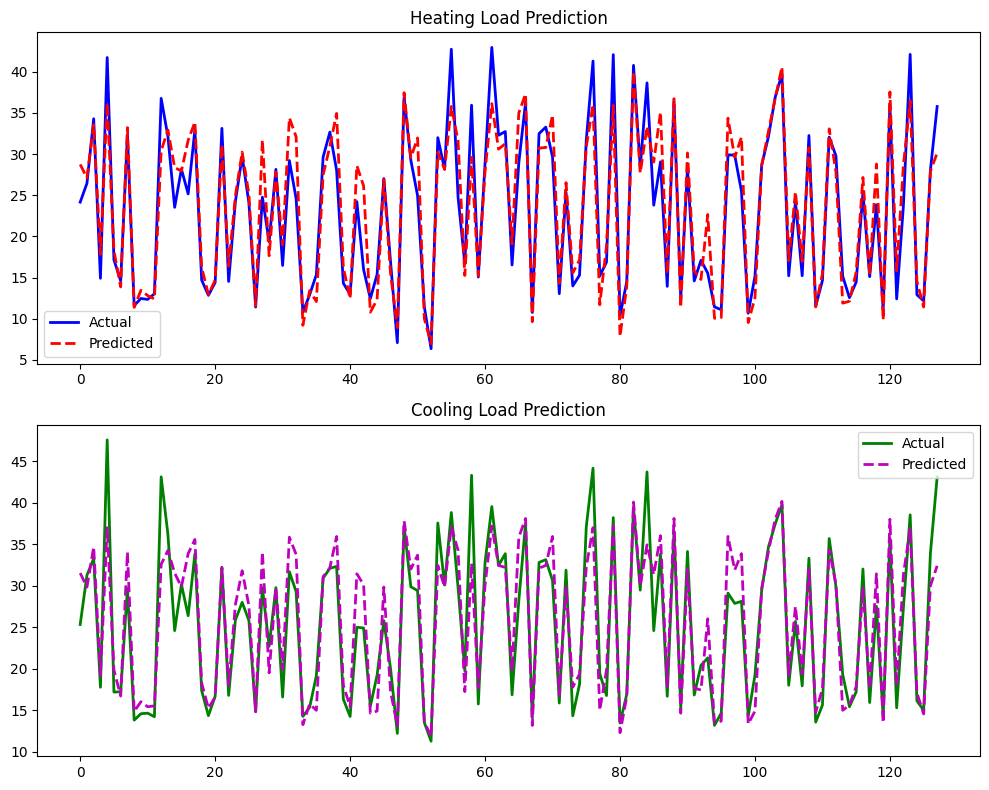

In [14]:

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(Y_test[:, 0], 'b', linewidth=2, label='Actual')
plt.plot(linear_pred[:, 0], 'r--', linewidth=2, label='Predicted')
plt.title('Heating Load Prediction')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(Y_test[:, 1], 'g', linewidth=2, label='Actual')
plt.plot(linear_pred[:, 1], 'm--', linewidth=2, label='Predicted')
plt.title('Cooling Load Prediction')
plt.legend()

plt.tight_layout()
plt.show()
